In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pylab
from scipy.signal import dfreqresp
from sklearn.model_selection import train_test_split
from visualize_clf import visualize_clf
from plot3d import plot3d
from prepare import prepare_data

params = {'xtick.labelsize': 18,
'ytick.labelsize': 18,
'axes.titlesize' : 22,
'axes.labelsize' : 20,
'legend.fontsize': 18,
'legend.title_fontsize': 22,
'figure.titlesize': 24 }
pylab.rcParams.update(params)

In [119]:
df = pd.read_csv('virus_data.csv')

In [120]:
df.shape

(1250, 25)

In [121]:
df['conversations_per_day'].value_counts()

conversations_per_day
2     220
4     207
3     201
5     153
6     125
1     115
7      77
8      52
10     33
9      23
11     14
12     10
13      7
16      4
14      4
17      3
21      2
Name: count, dtype: int64

In [122]:
# x = df.iloc[:,:-2]
# y = df.iloc[:,[0,-1,-2]]

In [123]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 9)
df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 134)


In [124]:
df_train.isnull().sum(axis=0)

patient_id                 0
age                        0
sex                        0
weight                     0
blood_type                 0
current_location           0
num_of_siblings            0
happiness_score            0
household_income         108
PCR_02                    56
conversations_per_day      0
sugar_levels               0
sport_activity             0
pcr_date                   0
PCR_01                     0
PCR_03                     0
PCR_04                     0
PCR_05                     0
PCR_06                     0
PCR_07                     0
PCR_08                     0
PCR_09                     0
PCR_10                     0
spread                     0
risk                       0
dtype: int64

In [125]:
df_test.isnull().sum(axis=0)

patient_id                0
age                       0
sex                       0
weight                    0
blood_type                0
current_location          0
num_of_siblings           0
happiness_score           0
household_income         31
PCR_02                   18
conversations_per_day     0
sugar_levels              0
sport_activity            0
pcr_date                  0
PCR_01                    0
PCR_03                    0
PCR_04                    0
PCR_05                    0
PCR_06                    0
PCR_07                    0
PCR_08                    0
PCR_09                    0
PCR_10                    0
spread                    0
risk                      0
dtype: int64

In [126]:
def plot_box(series, title, xlabel):
    cleaned_series = series.dropna()
    plt.figure(figsize=(8, 6))
    plt.boxplot(cleaned_series,
                vert=False)
    plt.xlabel(xlabel)
    plt.title(title)

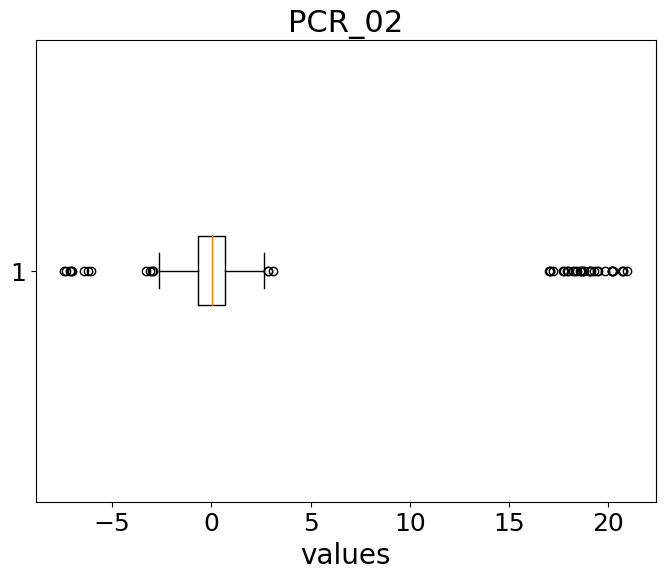

In [127]:
plot_box(df_train['PCR_02'], 'PCR_02', 'values')

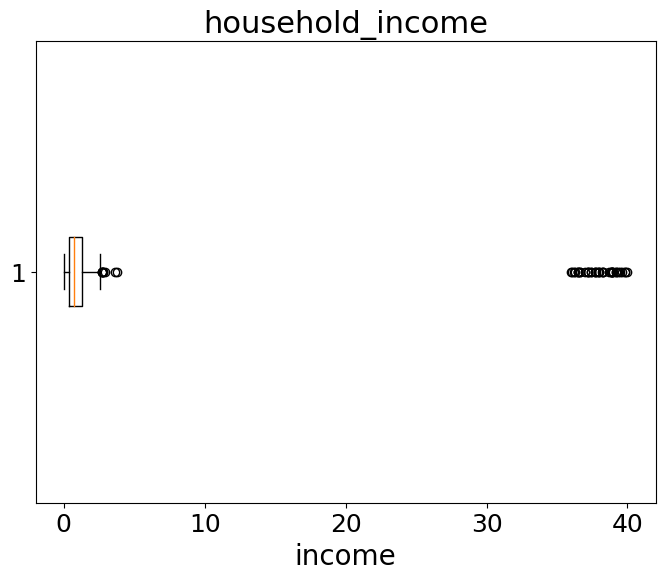

In [128]:
plot_box(df_train['household_income'], 'household_income', 'income')


In [129]:
df_train[['household_income', 'PCR_02']].aggregate(['mean', 'median'])


,household_income,PCR_02
mean,2.448206,0.551222
median,0.700000,0.018115


In [130]:
df_train.fillna(df_train[['household_income', 'PCR_02']].median(), inplace = True)
df_test.fillna(df_test[['household_income', 'PCR_02']].median(), inplace = True)

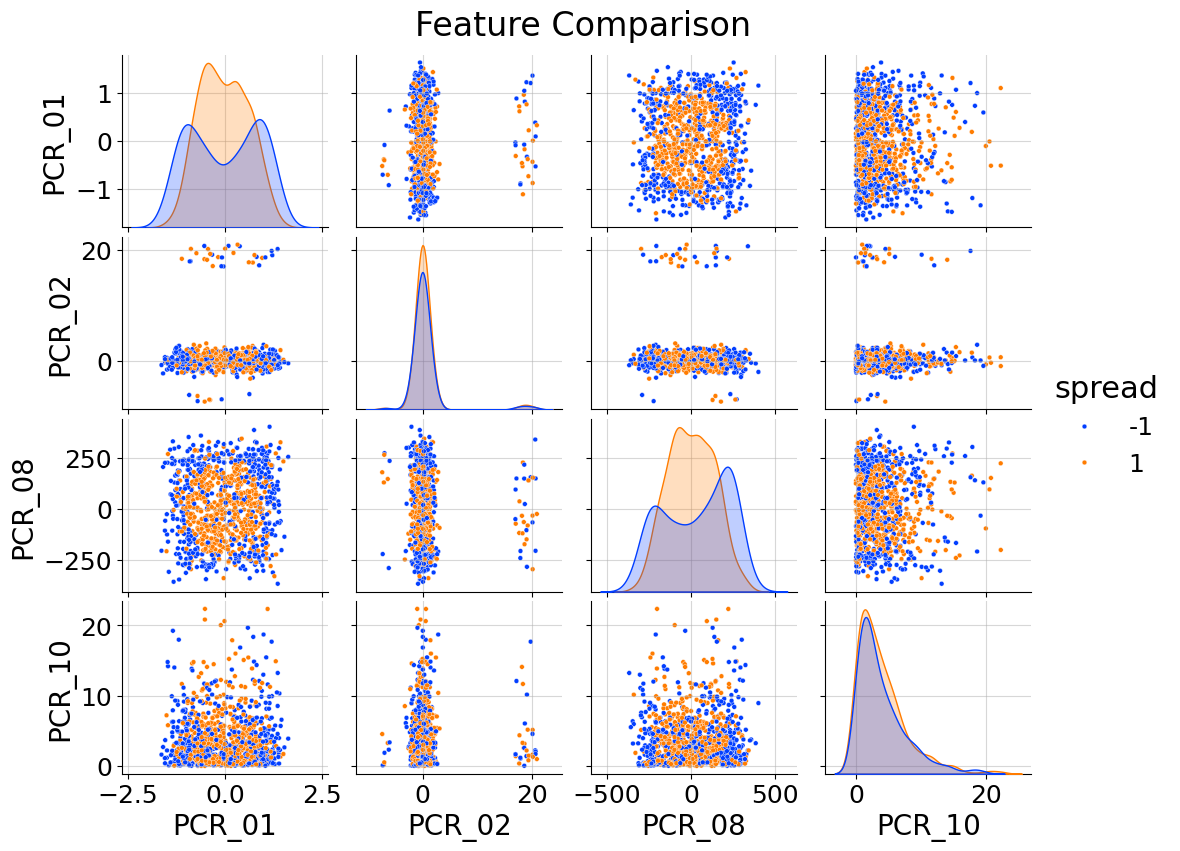

In [131]:
g=sns.pairplot(df_train[['PCR_01', 'PCR_02', 'PCR_08', 'PCR_10','spread']], plot_kws={"s": 12}, hue='spread', palette='bright')
g.fig.suptitle("Feature Comparison", y=1.04)
for ax in np.ravel(g.axes):
    ax.grid(alpha=0.5)
g.fig.set_size_inches(12,8)

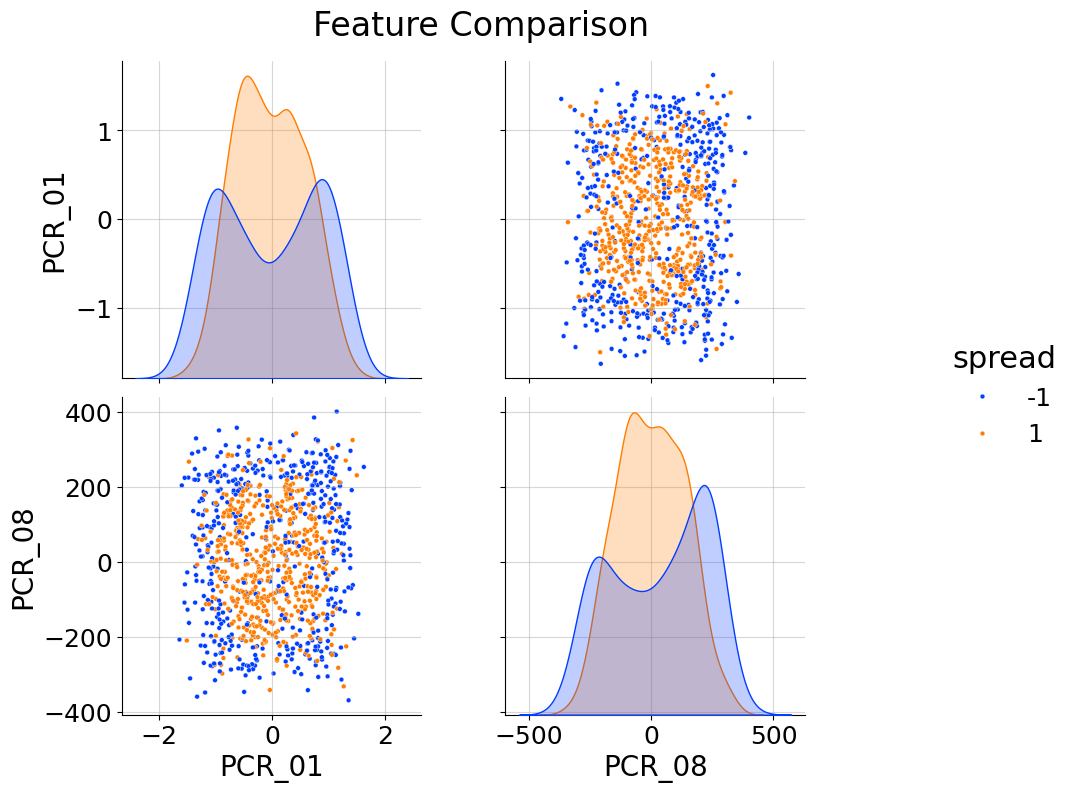

In [132]:
g=sns.pairplot(df_train[['PCR_01', 'PCR_08', 'spread']], plot_kws={"s": 12}, hue='spread', palette='bright')
g.fig.suptitle("Feature Comparison", y=1.04)
for ax in np.ravel(g.axes):
    ax.grid(alpha=0.5)
g.fig.set_size_inches(12,8)


In [133]:
print('corr between pcr_01 and spread: ',df_train['PCR_01'].corr(df['spread']))
print('corr between pcr_08 and spread: ',df_train['PCR_08'].corr(df['spread']))


corr between pcr_01 and spread:  -0.007133827993874139
corr between pcr_08 and spread:  -0.08897191105548764


In [134]:
from sklearn.base import BaseEstimator,ClassifierMixin
from scipy.spatial.distance import cdist

class kNN(BaseEstimator, ClassifierMixin):
    def __init__(self, n_neighbors:int = 3):
        self.n_neighbors = n_neighbors
    def fit(self, X, y):
        self.x_train = X.copy()
        self.y_train = y.copy()
        return self

    def predict(self, X):
        dist = cdist(X, self.x_train, metric='euclidean')
        top = np.argpartition(dist,self.n_neighbors, axis=1)[:, :self.n_neighbors]
        neighbor_labels = self.y_train[top]
        predictions = np.sign(np.sum(neighbor_labels, axis=1)) # TODO: what to do when sum == 0?

        return predictions


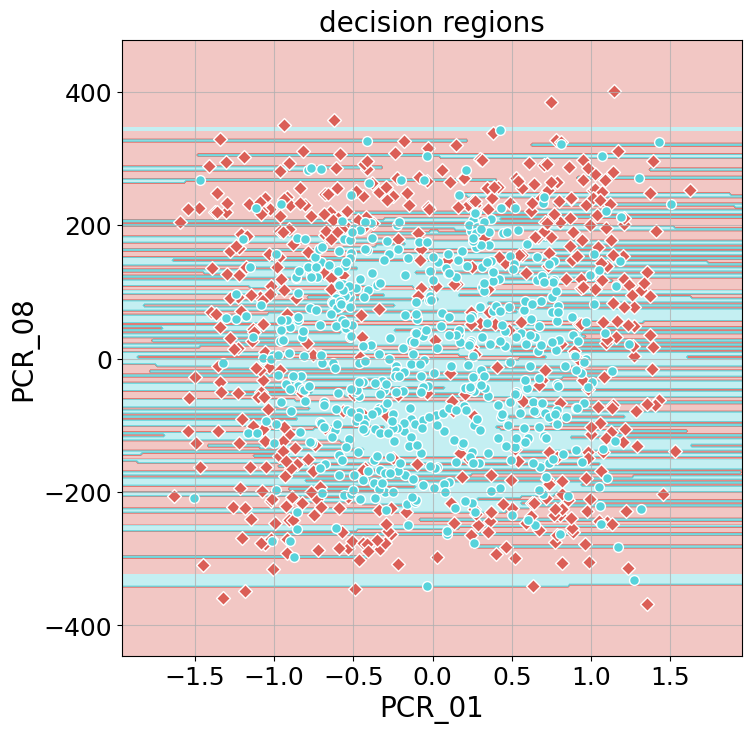

In [135]:
X = df_train[['PCR_01', 'PCR_08']].to_numpy()
y= df_train['spread'].to_numpy()

knn = kNN(n_neighbors=1)
knn.fit(X, y)
visualize_clf(knn,X,y,'decision regions', 'PCR_01', 'PCR_08')

In [136]:
# train score
knn.score(X, y)

1.0

In [137]:
# test score
X_test = df_test[['PCR_01', 'PCR_08']].to_numpy()
y_test = df_test['spread'].to_numpy()
knn.score(X_test, y_test)

0.604

In [138]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

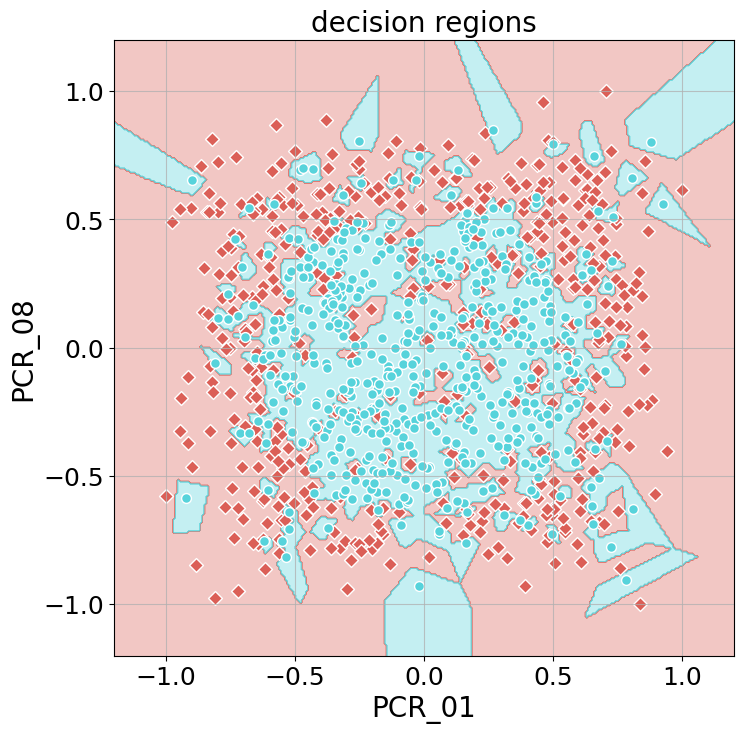

In [139]:
scaler_minmax = MinMaxScaler((-1,1))
scaler_minmax.fit(X)
norm_x = scaler_minmax.transform(X)
norm_x_test = scaler_minmax.transform(X_test)
knn.fit(norm_x, y)
visualize_clf(knn,norm_x,y,'decision regions', 'PCR_01', 'PCR_08')



In [140]:
print(f'training score: {knn.score(norm_x, y)} \ntest score: {knn.score(norm_x_test, y_test)}')

training score: 1.0 
test score: 0.648


In [141]:
knn.score(norm_x_test, y_test)

0.648

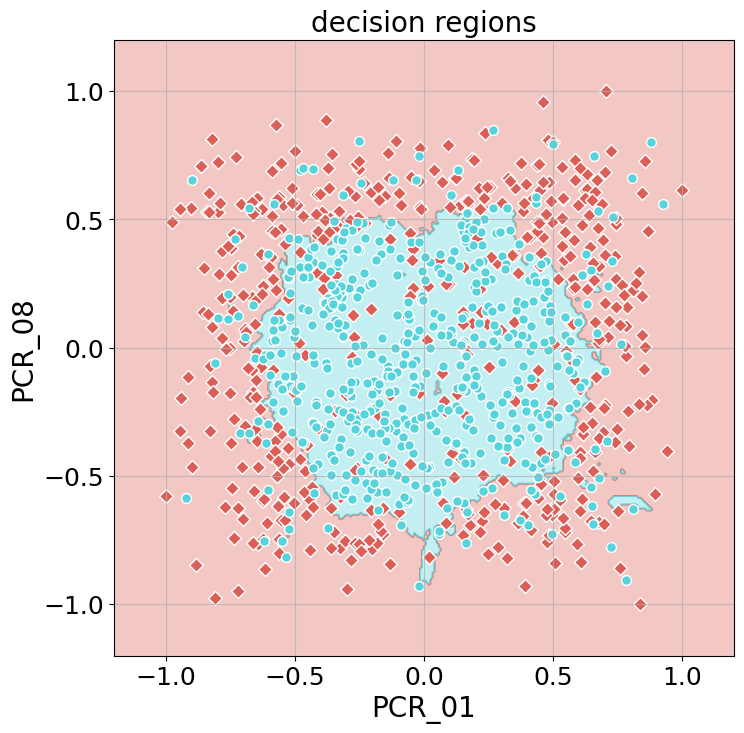

In [142]:
knn9 = kNN(n_neighbors=9)
knn9.fit(norm_x, y)
visualize_clf(knn9,norm_x,y,'decision regions', 'PCR_01', 'PCR_08')

In [143]:
print(f'training score: {knn9.score(norm_x, y)} \ntest score: {knn9.score(norm_x_test, y_test)}')

training score: 0.795 
test score: 0.792


In [144]:
df['SpecialProperty'] = df["blood_type"].isin(["O+", "B+"])



In [145]:
df.drop(columns=['blood_type'], inplace=True)

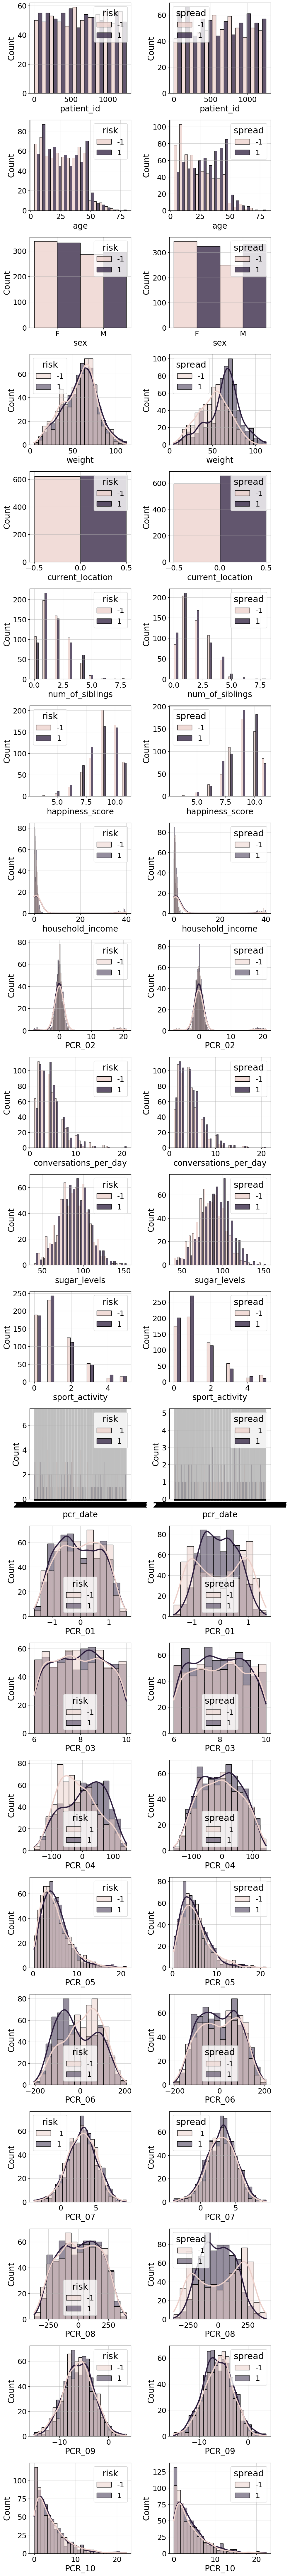

In [146]:
COL_NAME = df.columns[:-3]
COLS, ROWS = (2, len(COL_NAME))
plt.figure(figsize=(5 * COLS, 4 * ROWS))
for row in range(ROWS):
    column = COL_NAME[row]
    for j, cls in enumerate(["risk", "spread"]):
        plt.subplot(ROWS,COLS, row * COLS + 1 + j)

        isContinuous = "float" in df[column].dtype.name
        sns.histplot(data=df, x=column, hue=cls, line_kws={"linewidth": 3},
            kde=isContinuous, multiple="layer" if isContinuous else "dodge")
        plt.grid(alpha=0.5)
plt.tight_layout()

In [147]:
# sns.pairplot(df[df.filter(like='PCR').columns.tolist() + ["risk"]],
#  plot_kws={"s": 3}, hue="risk", palette="bright")

Text(0.5, 1.04, 'Special Property == false')

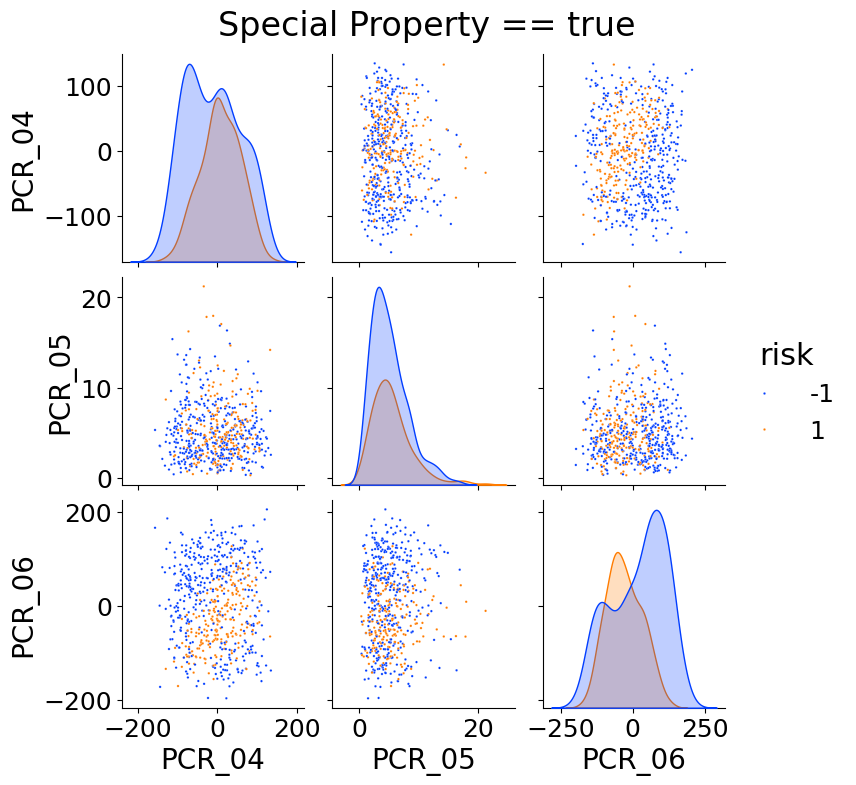

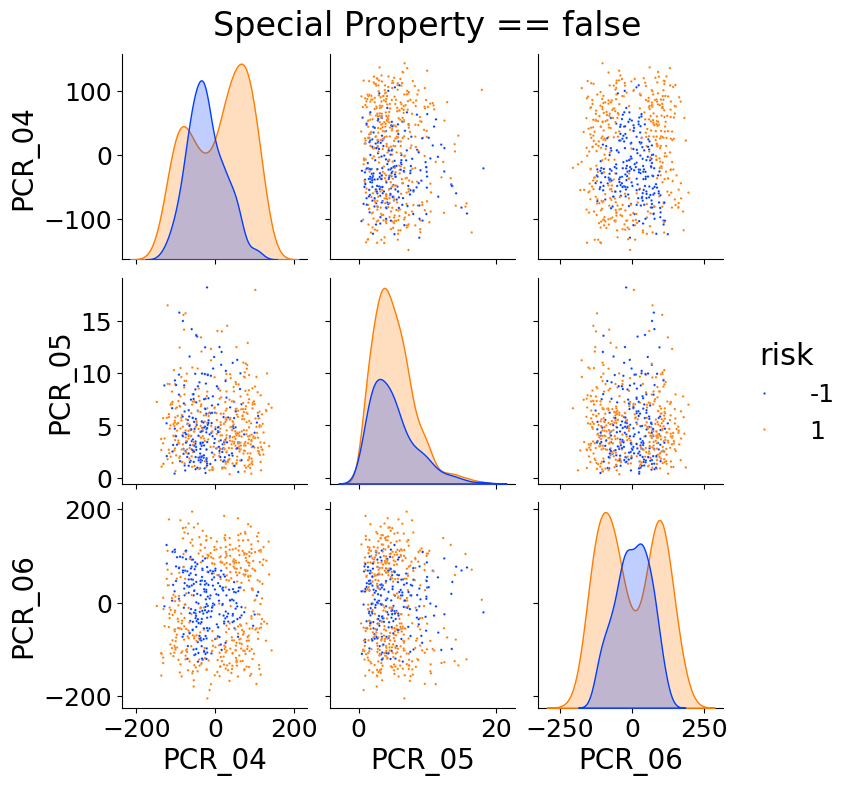

In [148]:
df_group_t = df[df['SpecialProperty'] == True]
df_group_f = df[df['SpecialProperty'] == False]

sns.pairplot(df_group_t[['PCR_04','PCR_05','PCR_06','risk']],
 plot_kws={"s": 3}, hue="risk", palette="bright")
plt.suptitle('Special Property == true', y=1.04)

sns.pairplot(df_group_f[['PCR_04','PCR_05','PCR_06','risk']],
 plot_kws={"s": 3}, hue="risk", palette="bright")
plt.suptitle('Special Property == false', y=1.04)

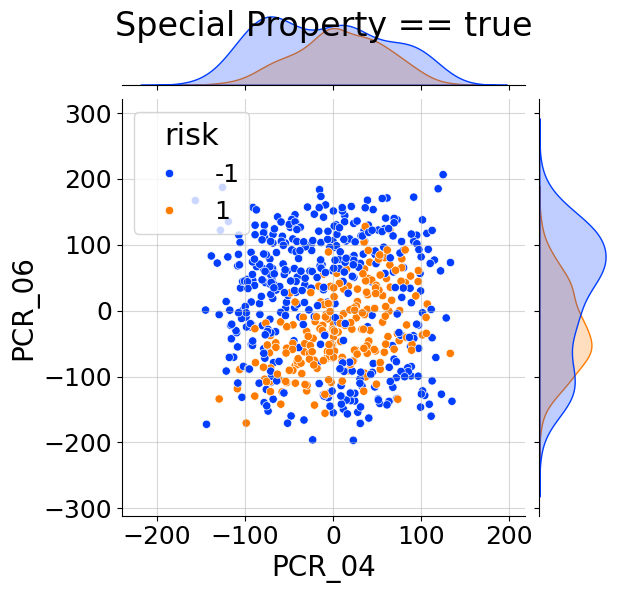

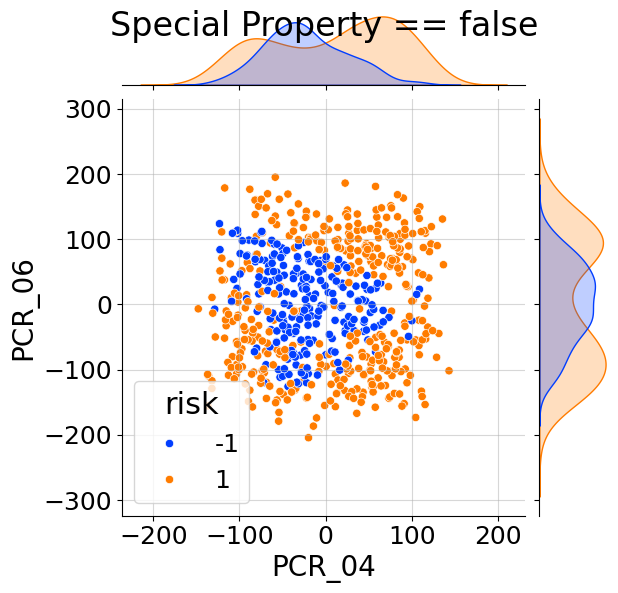

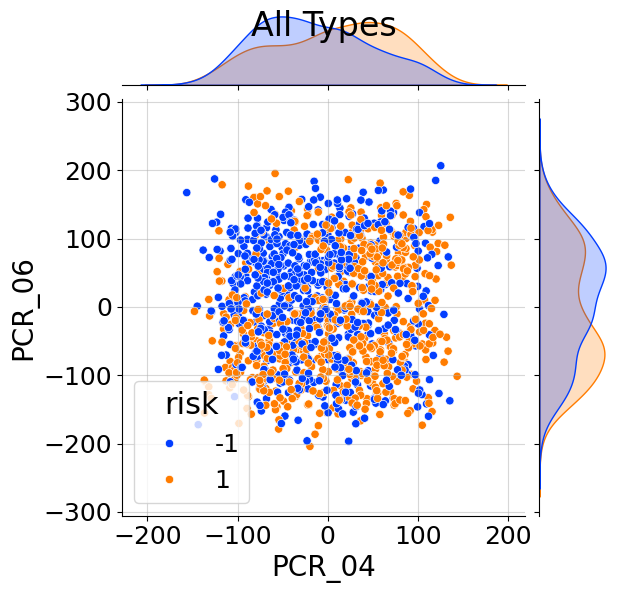

In [149]:
for d, t in zip([df_group_t, df_group_f, df], ['Special Property == true', 'Special Property == false', 'All Types']):
    sns.jointplot(data=d, x='PCR_04', y='PCR_06', hue='risk', palette='bright')
    plt.grid(alpha=0.5)
    plt.suptitle(t)


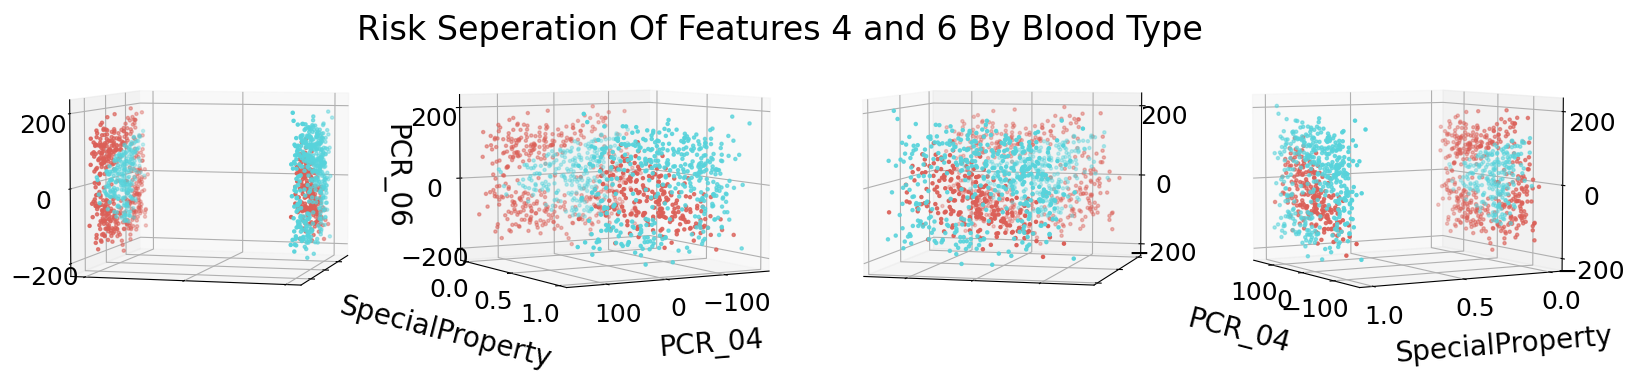

In [150]:

plot3d(df, "PCR_04", "SpecialProperty", "PCR_06", title="Risk Seperation Of Features 4 and 6 By Blood Type", hue="risk", s=5)

In [151]:
pcr_cols = set(df.columns[df.columns.str.startswith("PCR")])
minmax_cols = set(["PCR_04", "PCR_06", "PCR_03"])
df_scaled = df.copy()

minmax_scaler = MinMaxScaler((-1,1))
minmax_mask = df.columns.isin(minmax_cols)
df_scaled.loc[:, minmax_mask] = minmax_scaler.fit_transform(df.loc[:, minmax_mask])

zscore_scaler = StandardScaler()
zsocre_mask = df.columns.isin(pcr_cols.difference(minmax_cols))
df_scaled.loc[:, zsocre_mask] = zscore_scaler.fit_transform(df.loc[:, zsocre_mask])
